# Ejercicio de Regresion Logistica en Python

# Maira Karina Velarde Ozaeta 16111829

Para comenzar se realizan los import necesarios de los paquetes que se utilizaran durante el ejercicio.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Carga del archivo csv (datos de entrada)

El archivo csv (por simplicidad, se considera que estara en el mismo directorio qu el archivo notebook.ipynb) y se asigna mediante Pandas a la variable dataframe. Al utilizar el metodo dataframe.head() se visualiza en pantalla los 5 primeros registros

In [2]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


Acontinuacion se utiliza el metodo dataframe.describe() que proporciona estadistica descriptiva del conjunto de dartos: media, desviacion estandar, valores minimo y maximo de cada atributo.

In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


se cuantifican resultados de cada tipo usando la funcion groupby y se visualizan 86 usuarios "clase 0", es decir Windows, 40 usiarios Mac y 44 de linux.

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos

Se realiza una visualizacion para conocer a los atributos caracteristicos de la informacion que se trabaja y su correlacion.

En formato de histograma aparecen los 4 atributos de entrada etiquetados como: "duracion", "paginas", "acciones" y "valor". Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y en que intervalos se concentra la mayor densidad de registros.

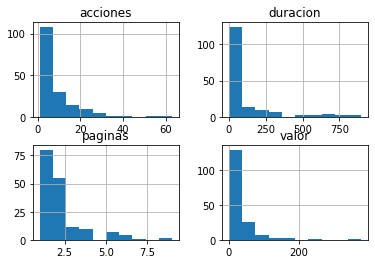

In [5]:
dataframe.drop(['clase'],1).hist()
plt.show()

Ademas se pueden interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema operativo Windows en azul, Macintosh en verde y Linux en rojo.

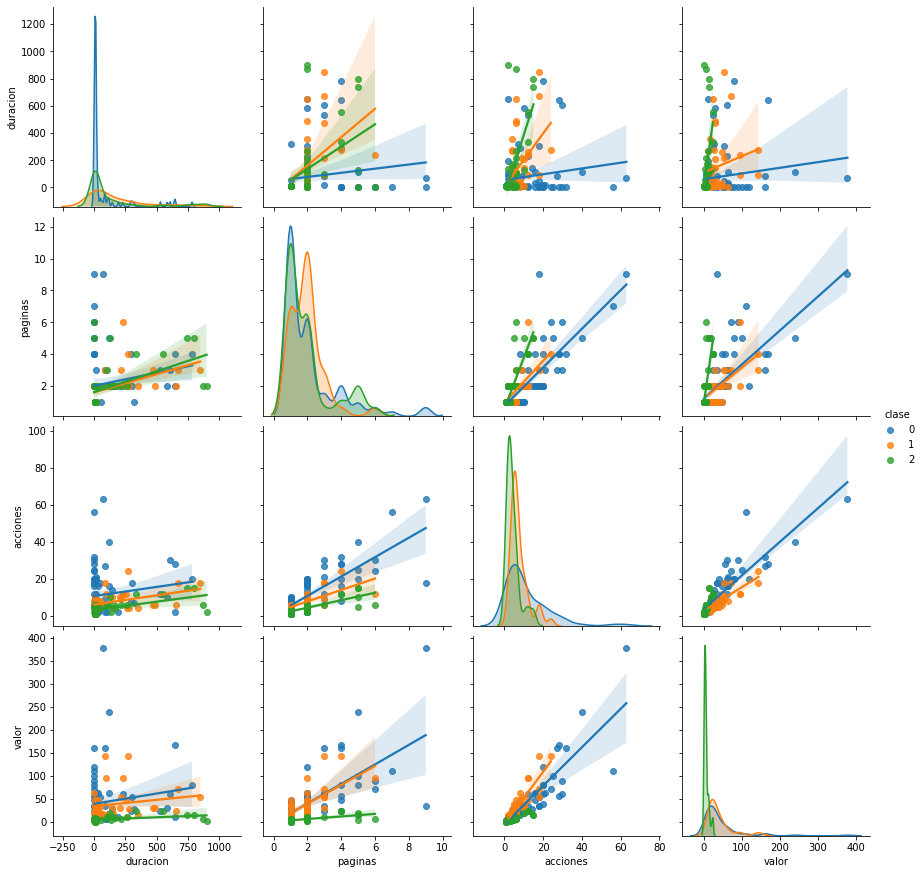

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',height=3,vars=["duracion", "paginas", "acciones", "valor"],kind='reg')

### Se establece el modelo de R Log

Se encargan los atributos de las 4 columnas de entrada en X exluyendo la columna "clase" con el metodo drop(). La columna "clase" se agrega al atributo y se ejecuta X.shape para comprobar la dimension de la matriz con datos de entrada de 170 registros por 4 columnas

In [7]:
X = np.array(dataframe.drop(['clase'],1))
Y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunto de entradas X y salidas Y.

In [8]:
model = linear_model.LogisticRegression()
model.fit(X,Y)

C:\Users\Administrador\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasifica todo el conjunto de entradas X utilizando el metodo "predict(X)". Si se revisan algunas se sus salidas se puede ver como coincide con las salidas reales del archivo csv

In [9]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Y se confirma el desempeno del modelo utilizando model.score() el cual devuelve la precision media de las prediciones, para este caso del 77%

In [10]:
model.score(X,Y)

0.7823529411764706